In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split , KFold
from sklearn.metrics import confusion_matrix,accuracy_score
from pprint import pprint 
from sklearn.naive_bayes import CategoricalNB
%matplotlib inline

In [2]:
data=pd.read_csv('dataset.csv')
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
reduced_data=data[['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'Submitting_to_email', 'Redirect', 'on_mouseover', 'RightClick', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic','Result']]
reduced_data


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Links_in_tags,Submitting_to_email,Redirect,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,-1,0,1,1,1,-1,-1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,-1,1,0,1,1,1,-1,-1,0,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,-1,-1,0,1,1,1,1,-1,1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,0,1,0,1,1,1,-1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,0,1,0,-1,1,1,-1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,1,-1,0,-1,-1,-1,1,1,-1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,-1,1,1,1,1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,-1,1,0,1,1,1,1,1,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,1,0,-1,1,1,1,1,1,-1


In [4]:
for i in range(reduced_data.shape[0]):
    for j in range(reduced_data.shape[1]):
        if reduced_data.loc[i][j]==-1:
            reduced_data.loc[i][j]=2
reduced_data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Links_in_tags,Submitting_to_email,Redirect,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Result
0,2,1,1,1,2,2,2,2,2,1,...,1,2,0,1,1,1,2,2,2,2
1,1,1,1,1,1,2,0,1,2,1,...,2,1,0,1,1,1,2,2,0,2
2,1,0,1,1,1,2,2,2,2,1,...,2,2,0,1,1,1,1,2,1,2
3,1,0,1,1,1,2,2,2,1,1,...,0,1,0,1,1,1,2,2,1,2
4,1,0,2,1,1,2,1,1,2,1,...,0,1,0,2,1,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,2,1,2,1,1,1,1,2,2,...,1,2,0,2,2,2,1,1,2,1
11051,2,1,1,2,2,2,1,2,2,2,...,2,2,1,2,1,1,1,1,1,2
11052,1,2,1,1,1,2,1,2,2,1,...,2,1,0,1,1,1,1,1,1,2
11053,2,2,1,1,1,2,2,2,1,2,...,1,1,0,2,1,1,1,1,1,2


In [5]:
x=reduced_data.iloc[:,0:22]
y=reduced_data.iloc[:,22]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape,x_test.shape)

(8844, 22) (2211, 22)


In [6]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [7]:
kf=KFold(n_splits=4,shuffle=True,random_state=1000)

In [8]:
accuracyscores=[]
for train,val in kf.split(x_train):
    nb=CategoricalNB()
    nb=nb.fit(x_train[train],y_train[train])
    tp,fn,fp,tn=confusion_matrix(y_train[val],nb.predict(x_train[val])).ravel()
    acc=(tn+tp)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(fn+tp)
    fpr=fp/(fp+tn)
    accuracyscores.append((acc,precision,recall,fpr))
print(np.mean(accuracyscores,axis=0))

[0.92729534 0.91982828 0.95209494 0.10344158]


In [9]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
model=gnb.fit(x_train,y_train)
y_pred=model.predict(x_test)
pred_prob=model.predict_proba(x_test)

In [10]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score1)

0.9582921956295526


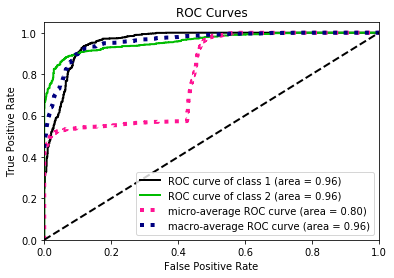

In [11]:
import scikitplot
import matplotlib.pyplot as plt

y_true = y_test
y_probas = model.predict_proba(x_test)
scikitplot.metrics.plot_roc(y_true, y_probas)
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [13]:
fnn=KNeighborsClassifier()
param_grid={
    "n_neighbors":[3,5,7,9,11,13,15],
    "metric":['euclidean','manhattan']
}
gs=GridSearchCV(KNeighborsClassifier(),param_grid,cv=10)
results=gs.fit(x_train,y_train)
results.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

In [14]:
def cal_metric(tp,fn,fp,tn):
    acc=(tn+tp)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(fn+tp)
    fpr=fp/(fp+tn)
    return str(acc)+' '+str(precision)+' '+str(recall)+' '+str(fpr)

In [15]:
accuracy_scoresknn=[]
for train,result in kf.split(x_train):
    modelknn=KNeighborsClassifier(n_neighbors=3,metric='manhattan')
    modelknn=modelknn.fit(x_train[train],y_train[train])
    tp,fn,fp,tn=confusion_matrix(y_train[val],modelknn.predict(x_train[val])).ravel()
    accuracy=(tn+tp)/(tn+tp+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    fpr=fp/(fp+tn)
    accuracy_scoresknn.append((accuracy,precision,recall,fpr))
print(np.mean(accuracy_scoresknn,axis=0))

[0.95624152 0.95182181 0.97052846 0.06167176]


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
d=DecisionTreeClassifier(random_state=10)
param={
    "max_depth":range(1,20),"random_state": [10]
}
gs=GridSearchCV(estimator=d,param_grid=param)
gs=gs.fit(x_train,y_train)
print(gs.best_params_)

{'max_depth': 17, 'random_state': 10}


In [18]:
accuracy_scoresd=[]
for train,val in kf.split(x_train):
    d=DecisionTreeClassifier(random_state=10,max_depth=17)
    d=d.fit(x_train[train],y_train[train])
    tp,fn,fp,tn=confusion_matrix(y_train[val],d.predict(x_train[val])).ravel()
    acc=(tn+tp)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(fn+tp)
    fpr=fp/(fp+tn)
    accuracy_scoresd.append((accuracy,precision,recall,fpr))
print(np.mean(accuracy_scoresd,axis=0))
    

[0.93532338 0.95106457 0.95951362 0.0614426 ]


In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_features='sqrt',n_estimators=50,oob_score=True)
param={
    'n_estimators':[200,500,700,1000],
    'max_features':['auto','sqrt','log2']
}
gs_rf=GridSearchCV(estimator=rf,param_grid=param,cv=10)
gs_rf.fit(x_train,y_train)
print(gs_rf.best_params_)

{'max_features': 'log2', 'n_estimators': 500}


In [20]:
accuracy_scores_rf=[]
for train,val in kf.split(x_train):
    model_rf=RandomForestClassifier(max_features='log2',n_estimators=500)
    model_rf=model_rf.fit(x_train[train],y_train[train])
    tp,fn,fp,tn=confusion_matrix(y_train[val],model_rf.predict(x_train[val])).ravel()
    accuracy=(tn+tp)/(tn+tp+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    fpr=fp/(fp+tn)
    accuracy_scores_rf.append((accuracy,precision,recall,fpr))
print(np.mean(accuracy_scores_rf,axis=0))

[0.95725916 0.95697427 0.9663863  0.05414293]


In [21]:
from sklearn import svm
svmclf=svm.SVC()
param={
    'C':[0.1,0.01,1,10,100],
    'gamma':[0.1,0.01,1,0.001],
    'kernel':['rbf','linear']
}
gs_svm=GridSearchCV(svm.SVC(),param_grid=param,cv=10)
gs_svm=gs_svm.fit(x_train,y_train)
print(gs_svm.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [23]:
accuracy_scores_svm=[]
for train,val in kf.split(x_train):
    model_svm=svm.SVC(kernel='rbf',gamma=1,C=1,probability=True)
    model_svm=model_svm.fit(x_train[train],y_train[train])
    tp, fn, fp, tn =confusion_matrix(y_train[val],model_svm.predict(x_train[val])).ravel()
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    accuracy_scores_svm.append((accuracy,precision,recall,fpr))
print(np.mean(accuracy_scores_svm,axis=0))

[0.95680687 0.96120707 0.96088649 0.04823535]


In [25]:
import pickle
pickle.dump(model_svm,open("SVM",'wb'))

In [26]:
pickle.dump(model_rf,open("RF",'wb'))

In [27]:
filename_dt = 'SVM'
loaded_model = pickle.load(open(filename_dt, 'rb'))
tp, fn, fp, tn = confusion_matrix(y_train, loaded_model.predict(x_train)).ravel()
accuracy = (tn+tp)/(fp+fn+tp+tn)
recall = tp/(tp+fn)
fpr = fp/(fp+tn)
print(accuracy)
print(recall)
print(fpr)

0.9730890999547716
0.9765640921133075
0.031242062484124967


In [28]:
filename_dt = 'RF'
loaded_model = pickle.load(open(filename_dt, 'rb'))
tp, fn, fp, tn = confusion_matrix(y_train, loaded_model.predict(x_train)).ravel()
accuracy = (tn+tp)/(fp+fn+tp+tn)
recall = tp/(tp+fn)
fpr = fp/(fp+tn)
print(accuracy)
print(recall)
print(fpr)

0.9745590230664858
0.9788057876502955
0.030734061468122936


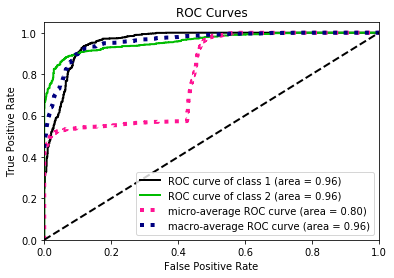

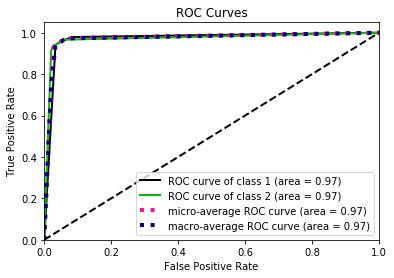

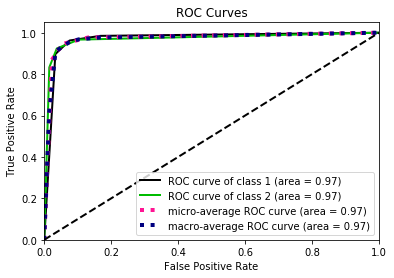

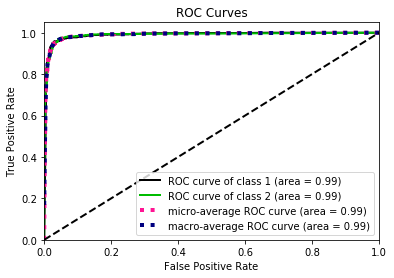

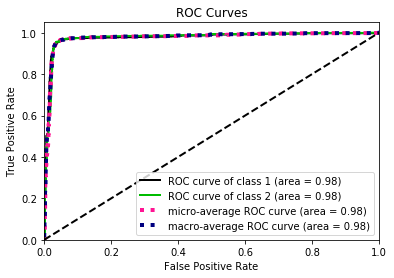

In [29]:
import scikitplot
import matplotlib.pyplot as plt

y_true = y_test
y_probas = model.predict_proba(x_test)
scikitplot.metrics.plot_roc(y_true, y_probas)
y_probas=d.predict_proba(x_test)
scikitplot.metrics.plot_roc(y_true, y_probas)
x_test1=x_test
y_probas=modelknn.predict_proba(x_test1)
scikitplot.metrics.plot_roc(y_true, y_probas)
y_probas=model_rf.predict_proba(x_test1)
scikitplot.metrics.plot_roc(y_true, y_probas)
y_probas=model_svm.predict_proba(x_test1)
scikitplot.metrics.plot_roc(y_true, y_probas)
plt.show()